In [1]:
import sys
import os
path = os.path.abspath("lib")
sys.path.append(path)

import al_sus as al
from dyson import Sigma
import al as al_se

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
import itertools

# matplotlib intensity plot scale
tl_big = matplotlib.colormaps['twilight_shifted'].resampled(int(1e3))
tl_resc = ListedColormap(tl_big(np.linspace(0.075, 0.925, 10000)))

# Quantification of Compression

### Plot of compressed susceptibility

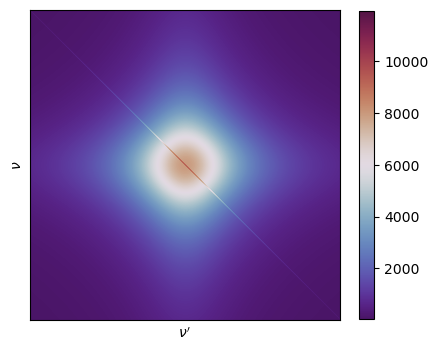

In [2]:
# compute chi 
u = 1
mu = u/2
niwf=256
beta=1000
chi_spin = al.chi_s(u, beta, u/2, niwf).real

# plot
n_nus = niwf
nu_range = slice(niwf-n_nus, niwf+n_nus)
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(chi_spin[nu_range, nu_range], cmap=tl_resc)
fig.colorbar(im, ax=ax, shrink=0.8)

ax.set_xticks([]) # remove ticks
ax.set_yticks([])

ax.set_xlabel(r"$\nu'$")
ax.set_ylabel(r"$\nu$")

#ax.set_title(rf"original $\chi_s$ for $\beta$={beta}", fontsize=10)

plt.savefig("graphics/compr_original.pdf", bbox_inches='tight')

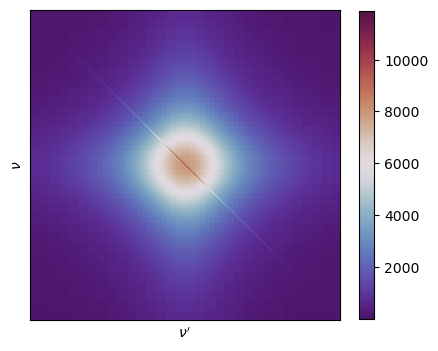

In [3]:
# pickled data to plot
data = pd.read_pickle("./data/ssim_cr_data.pkl")

beta = 1000
level = data['level'].max()  # max level
threshold = 0.99
pltdata = data[(data['beta']==beta) & (data['level']==level) & (data['threshold_quantile']==threshold)]['reconstruction_spin'].values[0]

# plot
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(pltdata, cmap=tl_resc)
fig.colorbar(im, ax=ax, shrink=0.8)

ax.set_xticks([]) # remove ticks
ax.set_yticks([])

ax.set_xlabel(r"$\nu'$") # set labels
ax.set_ylabel(r"$\nu$")

#ax.set_title(rf"reconstructed $\chi_s$ for $\beta$={beta}, $q$={threshold} and $l$={level}", fontsize=10)

plt.savefig(f"graphics/compr_rec.pdf", bbox_inches='tight')

Text(0, 0.5, '$\\nu$')

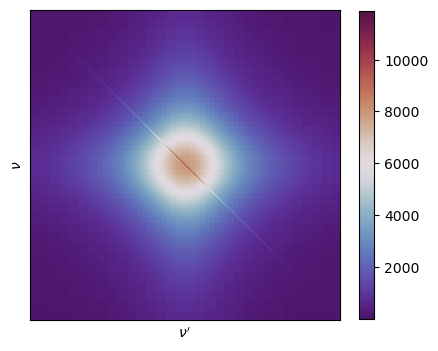

In [4]:
# pickled data to plot
data = pd.read_pickle("./data/ssim_cr_data.pkl")

beta = 1000
level = data['level'].max()  # max level
threshold = 0.95
pltdata2 = data[(data['beta']==beta) & (data['level']==level) & (data['threshold_quantile']==threshold)]['reconstruction_spin'].values[0]

# plot
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(pltdata, cmap=tl_resc)
fig.colorbar(im, ax=ax, shrink=0.8)

ax.set_xticks([]) # remove ticks
ax.set_yticks([])

ax.set_xlabel(r"$\nu'$") # set labels
ax.set_ylabel(r"$\nu$")

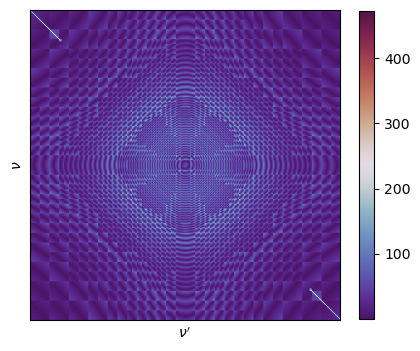

In [5]:
# plot
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(np.abs(pltdata-chi_spin), cmap=tl_resc)
fig.colorbar(im, ax=ax, shrink=0.8)

ax.set_xticks([]) # remove ticks
ax.set_yticks([])

ax.set_xlabel(r"$\nu'$") # set labels
ax.set_ylabel(r"$\nu$")

#ax.set_title(rf"$|\chi_s^{{original}}-\chi_s^{{reconstructed}}|$ for $\beta$={beta}, $q$={threshold} and $l$={level}", fontsize=9)

plt.savefig(f"graphics/compr_diff.pdf", bbox_inches='tight')

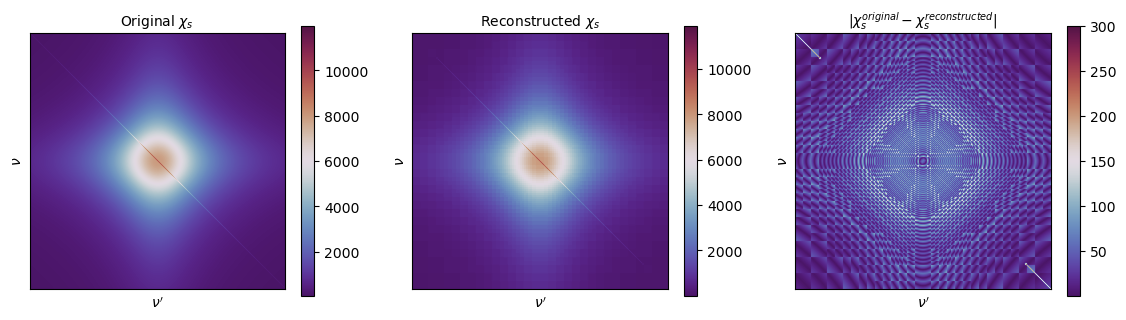

In [6]:
# create combined plot
fig, axs = plt.subplots(1,3, figsize=(14,5))

im = axs[0].imshow(chi_spin, cmap=tl_resc)
fig.colorbar(im, ax=axs[0], shrink=0.7)
axs[0].set_title(rf"Original $\chi_s$", fontsize=10)

im = axs[1].imshow(pltdata, cmap=tl_resc)
fig.colorbar(im, ax=axs[1], shrink=0.7)
axs[1].set_title(rf"Reconstructed $\chi_s$", fontsize=10)

im = axs[2].imshow(np.abs(pltdata-chi_spin), cmap=tl_resc, vmax=300)
fig.colorbar(im, ax=axs[2], shrink=0.7)
axs[2].set_title(rf"$|\chi_s^{{original}}-\chi_s^{{reconstructed}}|$", fontsize=10)

for ax in axs:
    ax.set_xticks([]) # remove ticks
    ax.set_yticks([])

    ax.set_xlabel(r"$\nu'$") # set labels
    ax.set_ylabel(r"$\nu$")
        
plt.savefig("graphics/compr_compare.pdf", bbox_inches="tight")

/var/folders/f3/5mwmxdln2t587p3x9czmpc3c0000gn/T/ipykernel_1958/3619173295.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("graphics/compr_compare2.pdf", bbox_inches="tight")
/var/folders/f3/5mwmxdln2t587p3x9czmpc3c0000gn/T/ipykernel_1958/3619173295.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("graphics/compr_compare2.pdf", bbox_inches="tight")
/Users/eminmoghadas/anaconda3/envs/waves/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


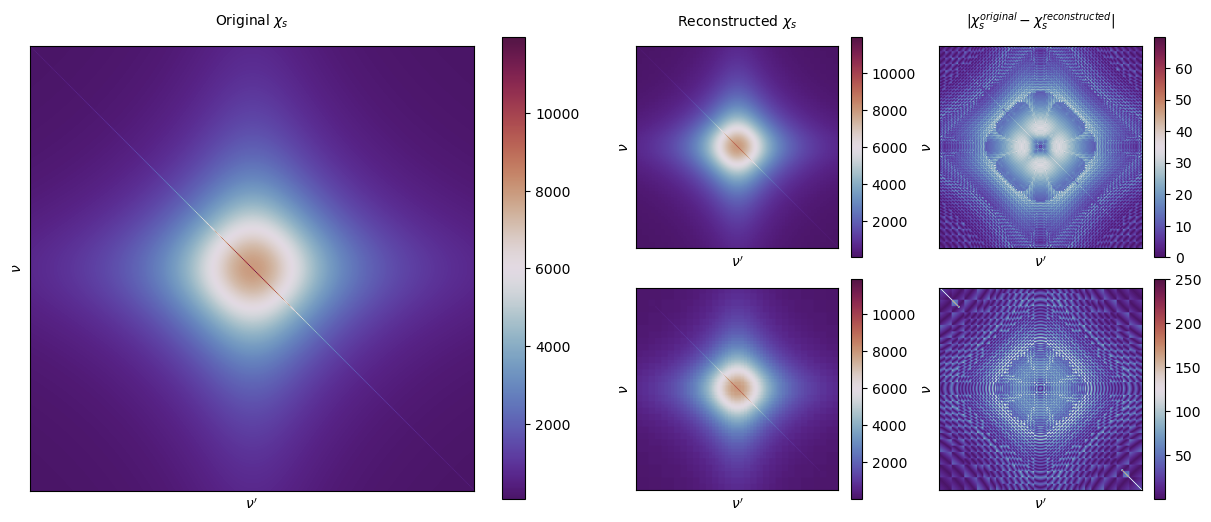

In [10]:
# plot two examples of threshold quantiles
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(15,6), tight_layout=True)
gs = gridspec.GridSpec(2, 4, hspace=0.1)

# og vertex
ax = fig.add_subplot(gs[:, :2])
im = ax.imshow(chi_spin, cmap=tl_resc)
fig.colorbar(im, ax=ax)
ax.set_title(rf"Original $\chi_s$", fontsize=10, pad=15)

ax.set_xticks([]) # remove ticks
ax.set_yticks([])

ax.set_xlabel(r"$\nu'$")
ax.set_ylabel(r"$\nu$")

# reconstructe q=0.95
ax = fig.add_subplot(gs[0, 2])
im = ax.imshow(pltdata2, cmap=tl_resc)
fig.colorbar(im, ax=ax)
ax.set_title(rf"Reconstructed $\chi_s$", fontsize=10, pad=15)

ax.set_xticks([]) # remove ticks
ax.set_yticks([])

ax.set_xlabel(r"$\nu'$")
ax.set_ylabel(r"$\nu$")

ax = fig.add_subplot(gs[0,3])
im = ax.imshow(np.abs(pltdata2-chi_spin), cmap=tl_resc)
fig.colorbar(im, ax=ax)
ax.set_title(rf"$|\chi_s^{{original}}-\chi_s^{{reconstructed}}|$", fontsize=10, pad=15)

ax.set_xticks([]) # remove ticks
ax.set_yticks([])

ax.set_xlabel(r"$\nu'$")
ax.set_ylabel(r"$\nu$")

# reconstruct q=0.99
ax = fig.add_subplot(gs[1, 2])
im = ax.imshow(pltdata, cmap=tl_resc)
fig.colorbar(im, ax=ax)
#ax.set_title(rf"Reconstructed $\chi_s$", fontsize=10, pad=15)

ax.set_xticks([]) # remove ticks
ax.set_yticks([])

ax.set_xlabel(r"$\nu'$")
ax.set_ylabel(r"$\nu$")

ax = fig.add_subplot(gs[1,3])
im = ax.imshow(np.abs(pltdata-chi_spin), cmap=tl_resc, vmax=250)
fig.colorbar(im, ax=ax)
#ax.set_title(rf"$|\chi_s^{{original}}-\chi_s^{{reconstructed}}|$", fontsize=10, pad=15)

ax.set_xticks([]) # remove ticks
ax.set_yticks([])

ax.set_xlabel(r"$\nu'$")
ax.set_ylabel(r"$\nu$")

fig.align_labels()  # same as fig.align_xlabels(); fig.align_ylabels()

plt.savefig("graphics/compr_compare2.pdf", bbox_inches="tight")

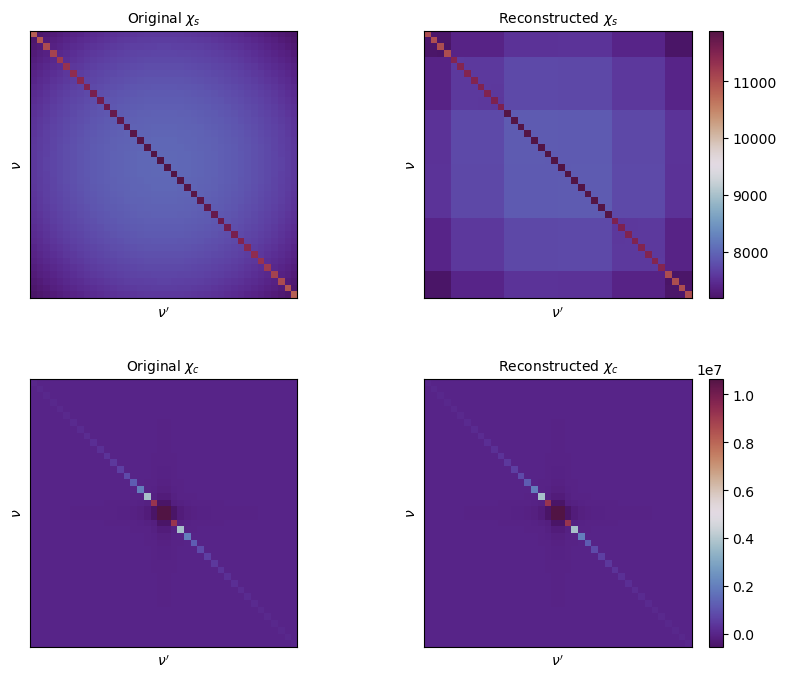

In [11]:
# zoom of charge and spin susceptibility

# returns reconstructed chi after compression 
def compress(chi, level, q):
    import pywt

    a = np.int32(chi.shape[0]/(2**(level)))
    coeffs_c = pywt.wavedec2(chi,'haar',level=level)
    coeff_c_arr,coeff_c_slices = pywt.coeffs_to_array(coeffs_c)

    c_details = np.concatenate((coeff_c_arr[a:,:].flatten(), coeff_c_arr[:a,a:].flatten()))

    thresh_c = np.quantile(np.abs(c_details), q)

    approx_c = np.copy(coeff_c_arr[:a,:a])
    coeff_c_arr_rec = (np.abs(coeff_c_arr[:,:]) >= thresh_c) * coeff_c_arr[:,:]
    coeff_c_arr_rec[:a,:a] = np.copy(approx_c)

    chi_rec = pywt.waverec2(pywt.array_to_coeffs(coeff_c_arr_rec,coeff_c_slices,output_format='wavedec2'),'haar')
    
    return chi_rec

# compute reconstructed chi_r for coars graining plot
u = 0.00362759873
niwf=256
beta=1000
chi_c = al.chi_c(u, beta, u/2, niwf).real
chi_c_rec = compress(chi_c, 8, 0.99)
u=1
chi_s = al.chi_s(u, beta, u/2, niwf).real
chi_s_rec = compress(chi_s, 8, 0.99)

n_nus = 20
nu_range = slice(niwf-n_nus, niwf+n_nus)


# plot
fig, axs = plt.subplots(2,2, figsize=(10,8), gridspec_kw={'hspace':0.3, 'wspace':0.2})

axs[0,0].imshow(chi_s[nu_range, nu_range], cmap=tl_resc)
axs[0,0].set_title(rf"Original $\chi_s$", fontsize=10)

im = axs[0,1].imshow(chi_s_rec[nu_range, nu_range], cmap=tl_resc)
fig.colorbar(im, ax=axs[0,1])
axs[0,1].set_title(rf"Reconstructed $\chi_s$", fontsize=10)

axs[1,0].imshow(chi_c[nu_range, nu_range], cmap=tl_resc)
axs[1,0].set_title(rf"Original $\chi_c$", fontsize=10)

im = axs[1,1].imshow(chi_c_rec[nu_range, nu_range], cmap=tl_resc)
fig.colorbar(im, ax=axs[1,1])
axs[1,1].set_title(rf"Reconstructed $\chi_c$", fontsize=10)

for ax in axs.flatten():
    ax.set_xticks([]) # remove ticks
    ax.set_yticks([])

    ax.set_xlabel(r"$\nu'$") # set labels
    ax.set_ylabel(r"$\nu$")

plt.savefig("graphics/compr_compare_zoom.pdf", bbox_inches="tight")

### Batch generation of heatmaps for CR and SSIM

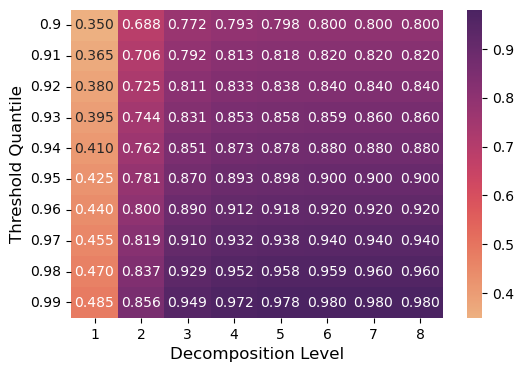

In [12]:
# test generation of one heatmap
sus = "spin"
beta = 1000
val = "compression"

heatmap_data = data[data['beta'] == beta].pivot_table(values=f'{val}_{sus}', index='threshold_quantile', columns='level')
heatmap_data.index = heatmap_data.index.set_names(['thresholdquantile'])

# plot
plt.rcParams['figure.figsize'] = 6, 4
ax = sns.heatmap(heatmap_data, annot=True, cmap="flare", fmt='.3f')
cbar = ax.collections[0].colorbar   # Get the colorbar
#plt.title("Rate of Compression", fontsize=15)
plt.xlabel('Decomposition Level', fontsize=12)
plt.ylabel('Threshold Quantile', fontsize=12)
plt.savefig("graphics/CR_sus.pdf", bbox_inches='tight')
plt.show()

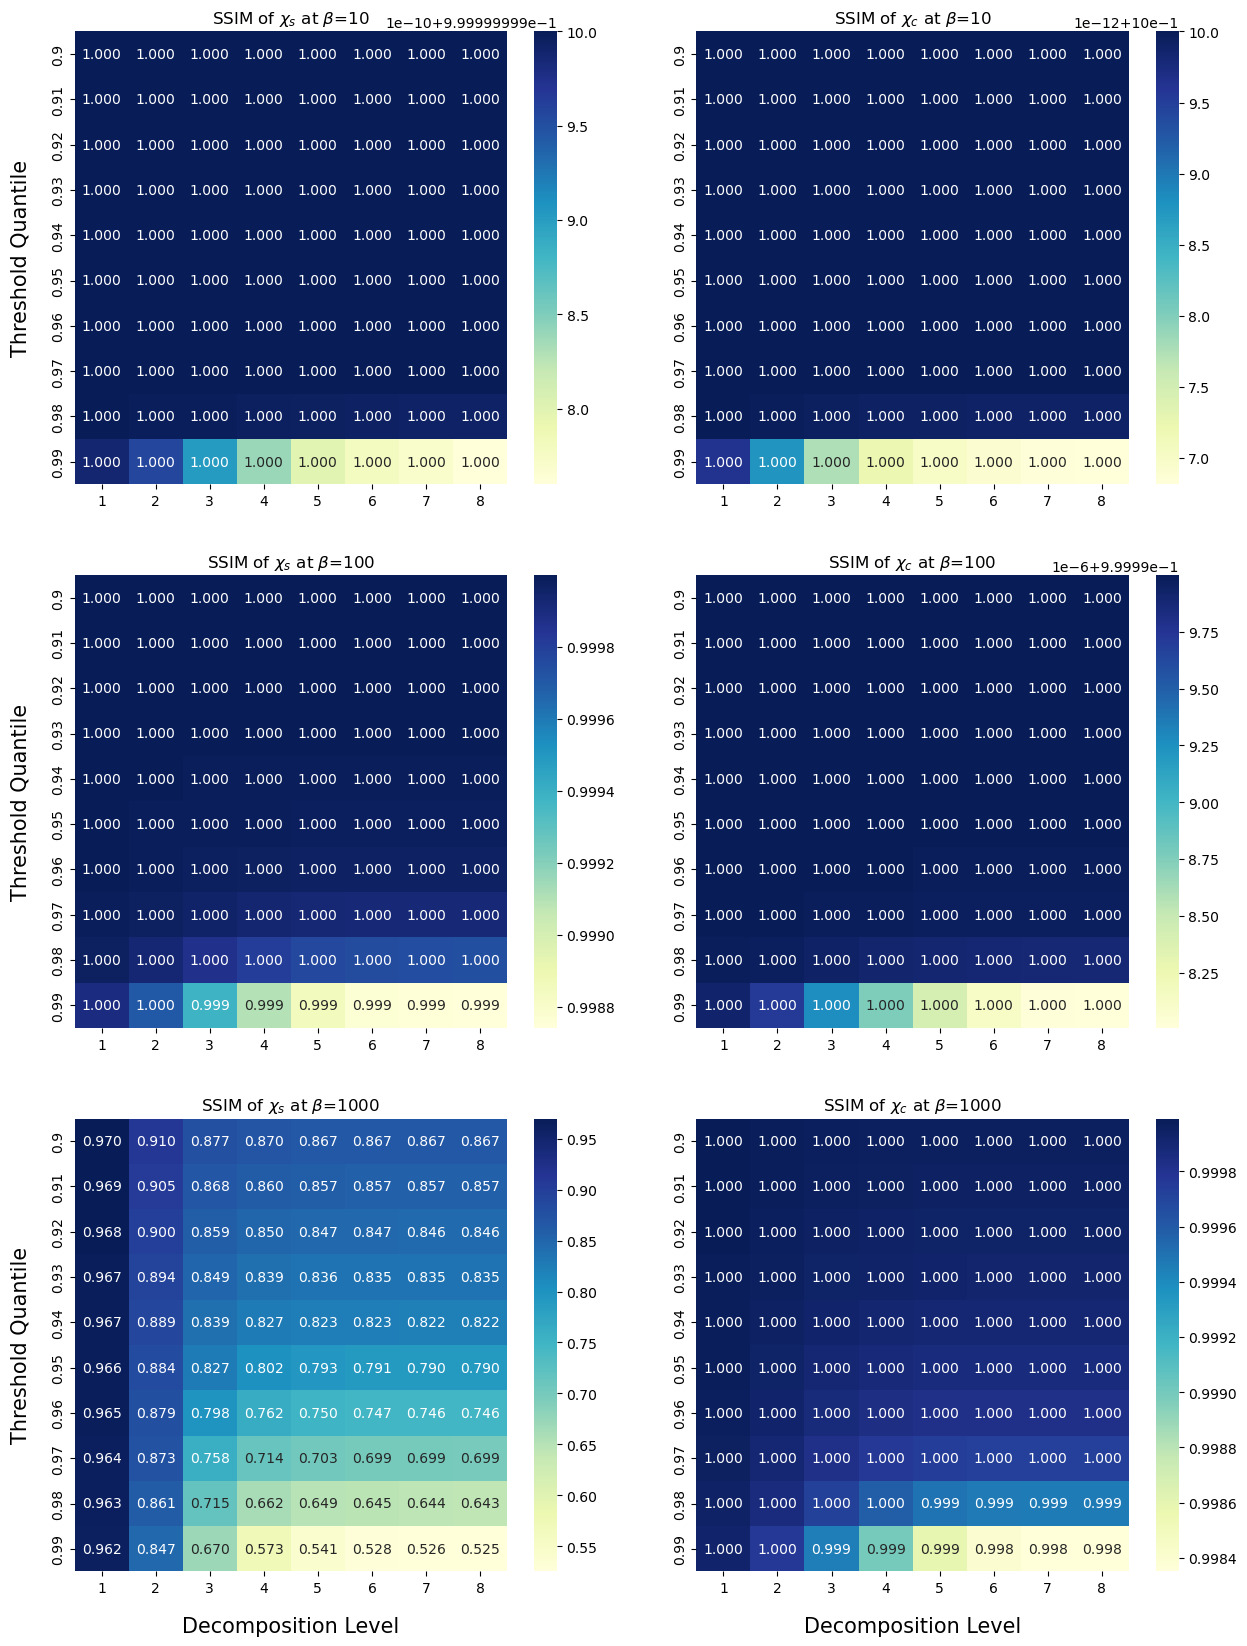

In [13]:
# make subplots for ssim
fig, axs = plt.subplots(3,2, figsize=(15,20), gridspec_kw={'hspace': 0.2, 'wspace':0.15})

for j,sus in enumerate(["spin", "charge"]):
    for i,beta in enumerate(data['beta'].unique()):
        heatmap_data = data[data['beta'] == beta].pivot_table(values=f'ssim_{sus}', index='threshold_quantile', columns='level')
        heatmap_data.index = heatmap_data.index.set_names(['thresholdquantile'])
        ax = sns.heatmap(heatmap_data, ax=axs[i,j], annot=True, cmap='YlGnBu', fmt='.3f')
        cbar = ax.collections[0].colorbar
        if j==0:
            axs[i,j].set_ylabel("Threshold Quantile", fontsize=15, labelpad=15) 
        else:
            axs[i,j].set_ylabel(None)
        if i==2:
            axs[i,j].set_xlabel("Decomposition Level", fontsize=15, labelpad=15)
        else:
            axs[i,j].set_xlabel(None)
        axs[i,j].set_title(rf"SSIM of $\chi_{sus[0]}$ at $\beta$={beta}")

plt.savefig("graphics/ssim_all.pdf", bbox_inches='tight')

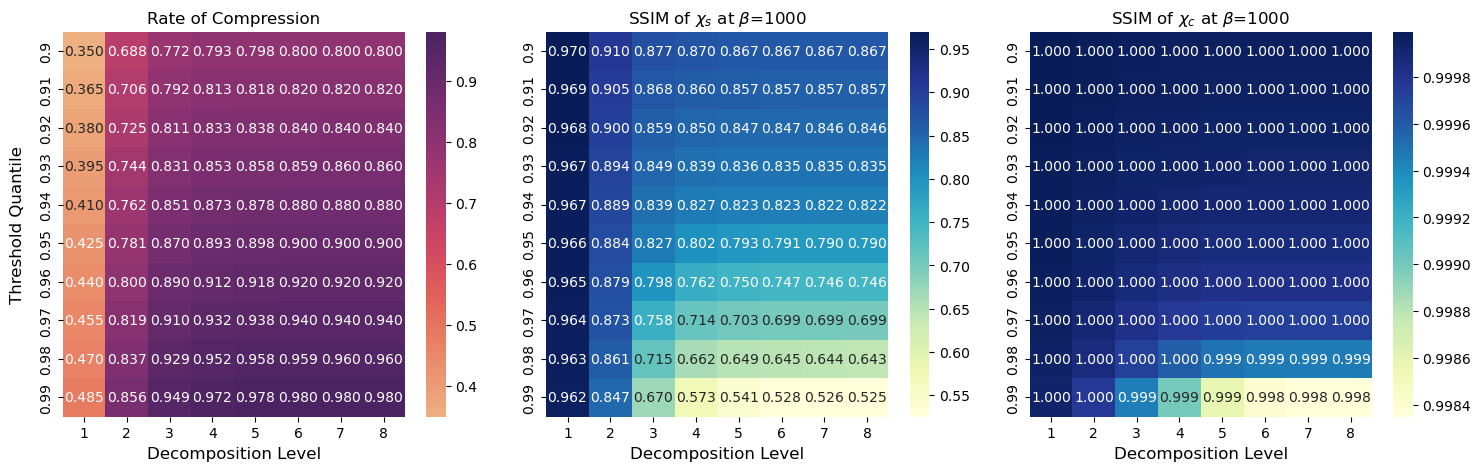

In [14]:
# combine cr and ssim into one plot
fig, axs = plt.subplots(1,3, figsize=(18,5), gridspec_kw={'wspace':0.13})

# cr heatmap
sus = "spin"
beta = 1000
val = "compression"

heatmap_data = data[data['beta'] == beta].pivot_table(values=f'{val}_{sus}', index='threshold_quantile', columns='level')
heatmap_data.index = heatmap_data.index.set_names(['thresholdquantile'])

ax = sns.heatmap(heatmap_data, ax=axs[0], annot=True, cmap="flare", fmt='.3f')
cbar = ax.collections[0].colorbar   # Get the colorbar
axs[0].set_title("Rate of Compression", fontsize=12)
axs[0].set_xlabel('Decomposition Level', fontsize=12)
axs[0].set_ylabel('Threshold Quantile', fontsize=12, labelpad=10)


#ssim heatmap spin
beta = 1000
val = "ssim_spin"

heatmap_data = data[data[f'beta'] == beta].pivot_table(values=f'{val}', index='threshold_quantile', columns='level')
heatmap_data.index = heatmap_data.index.set_names(['thresholdquantile'])

ax = sns.heatmap(heatmap_data, ax=axs[1], annot=True, cmap='YlGnBu', fmt='.3f')
cbar = ax.collections[0].colorbar   # Get the colorbar
axs[1].set_title(rf"SSIM of $\chi_s$ at $\beta$={beta}", fontsize=12)
axs[1].set_xlabel('Decomposition Level', fontsize=12)
axs[1].set_ylabel(None)

#ssim heatmap spin
beta = 1000
val = "ssim_charge"

heatmap_data = data[data[f'beta'] == beta].pivot_table(values=f'{val}', index='threshold_quantile', columns='level')
heatmap_data.index = heatmap_data.index.set_names(['thresholdquantile'])

ax = sns.heatmap(heatmap_data, ax=axs[2], annot=True, cmap='YlGnBu', fmt='.3f')
cbar = ax.collections[0].colorbar   # Get the colorbar
axs[2].set_title(rf"SSIM of $\chi_c$ at $\beta$={beta}", fontsize=12)
axs[2].set_xlabel('Decomposition Level', fontsize=12)
axs[2].set_ylabel(None)

plt.savefig("graphics/cr_ssim.pdf", bbox_inches="tight")


# Spin vs Charge Susceptibility

In [15]:
# plotting settings

import scienceplots
plt.style.use(['science', 'no-latex'])
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['lines.markersize'] = 8

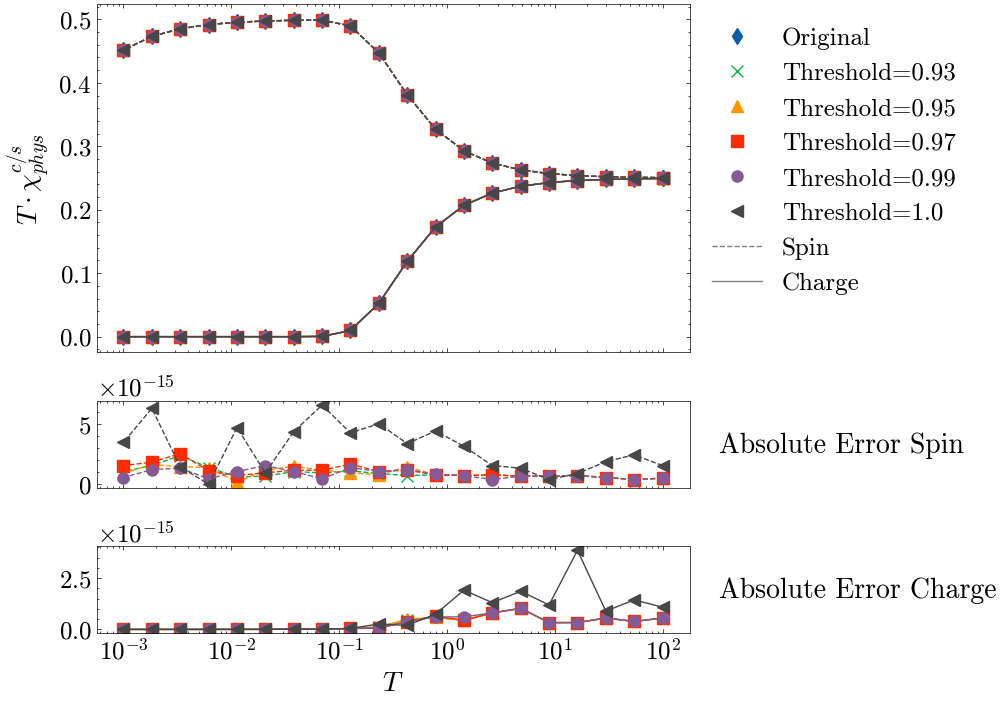

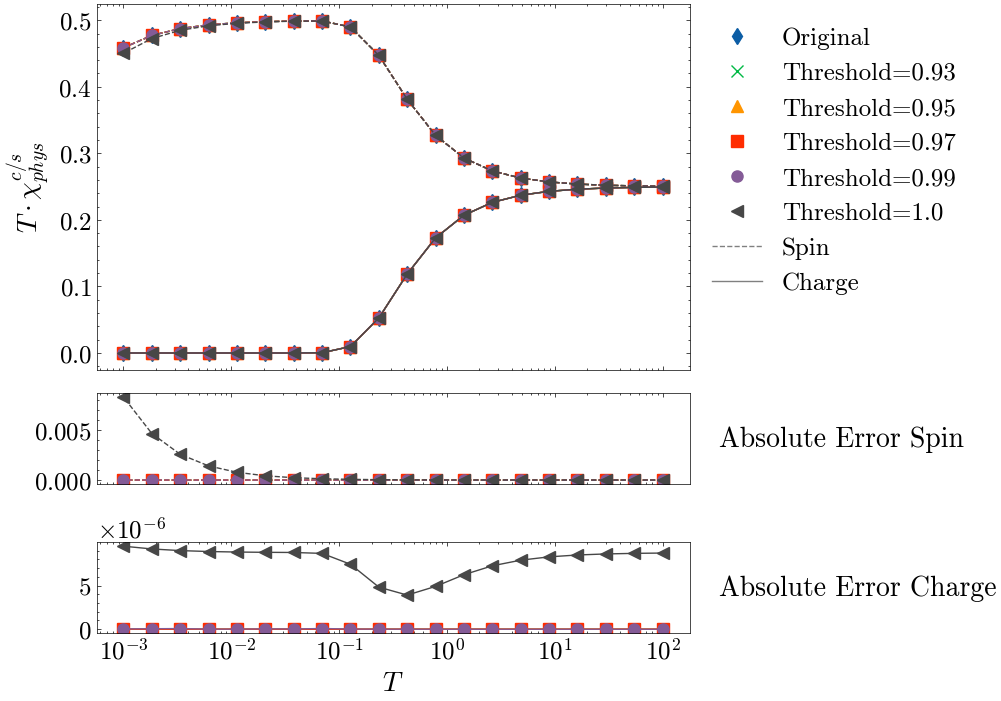

In [16]:
# read from file
df = pd.read_pickle("./data/sc_sep_data.pkl")

# Define a list of markers
markers = ['d', 'x', '^', 's', 'o', '<', '>', 'p', '*', '+']

# plot charge/spin susc.
for niwf in df['niwf'].unique():
    marker_cycler = itertools.cycle(markers)
    data = df.loc[df["niwf"] == niwf].copy()
    data.loc[:, '1/beta'] = 1 / data['beta']
    data.loc[:, 'T_phys_chi_charge'] = 1/data['beta'] * data['phys_chi_charge']
    data.loc[:, 'T_phys_chi_spin'] = 1/data['beta'] * data['phys_chi_spin']

    # Getting unique threshold values
    thresholds = data['threshold_quantile'].unique()

    # Create a new figure with three subplots, the top one being larger
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 7), 
                                        gridspec_kw={'height_ratios': [4, 1, 1], 'hspace': 0.1}, 
                                        sharex=True, constrained_layout=True)

    # Extract the original data
    original_data = data[data['threshold_quantile'] == 0]
    orig_charge = original_data['T_phys_chi_charge'].values
    orig_spin = original_data['T_phys_chi_spin'].values

    # Looping over the unique threshold values
    for threshold in thresholds:
        temp_df = data[data['threshold_quantile'] == threshold]
        color = next(ax1._get_lines.prop_cycler)['color']
        marker = next(marker_cycler)

        # Plotting T_phys_chi_charge on ax1
        ax1.plot(temp_df['1/beta'], temp_df['T_phys_chi_charge'], color=color, marker=marker)

        # Plotting T_phys_chi_spin on ax1
        ax1.plot(temp_df['1/beta'], temp_df['T_phys_chi_spin'], color=color, linestyle='--', marker=marker)

        # Add legend entries
        if threshold == 0:
            ax1.plot([], [], color=color, marker=marker, linestyle='none', label=f'Original')
        else:
            ax1.plot([], [], color=color, marker=marker, linestyle='none', label=f'Threshold={threshold}')

            # Calculate differences and plot on ax2 and ax3
            diff_charge = np.abs(orig_charge - temp_df['T_phys_chi_charge'].values)
            diff_spin = np.abs(orig_spin - temp_df['T_phys_chi_spin'].values)

            ax3.plot(temp_df['1/beta'], diff_charge, color=color, marker=marker)
            ax2.plot(temp_df['1/beta'], diff_spin, color=color, linestyle='--', marker=marker)

    # Additional legend entries for spin/charge differentiation
    ax1.plot([], [], color='grey', linestyle='--', label='Spin') 
    ax1.plot([], [], color='grey', linestyle='-', label='Charge') 

    # Labels, scaling, and grids
    ax1.set_ylabel(r'$T \cdot \chi^{c/s}_{phys}$')
    ax3.set_ylabel('Charge Diff')
    ax2.set_ylabel('Spin Diff')
    ax3.set_xlabel(r'$T$')
    
    # Adjusting the x-axis for ax2 and ax3 to be on the right side
    ax3.set_ylabel("Absolute Error Charge", rotation=0, ha='left', va='center')
    ax3.yaxis.set_label_coords(1.05,0.5)
    ax3.yaxis.tick_left()

    ax2.set_ylabel("Absolute Error Spin", rotation=0, ha='left', va='center')
    ax2.yaxis.set_label_coords(1.05,0.5)
    ax2.yaxis.tick_left()
        
    for ax in [ax1, ax2, ax3]:
        ax.set_xscale('log')
        #ax.grid()

    # Adding the legend to ax1
    ax1.legend(bbox_to_anchor=(1, 1))

    # Save the plot
    plt.savefig(f'graphics/spin_charge_sep_{niwf}.pdf', bbox_inches='tight')

# Eigenvalues and Eigenvectors

### Number of Negative Eigenvalues

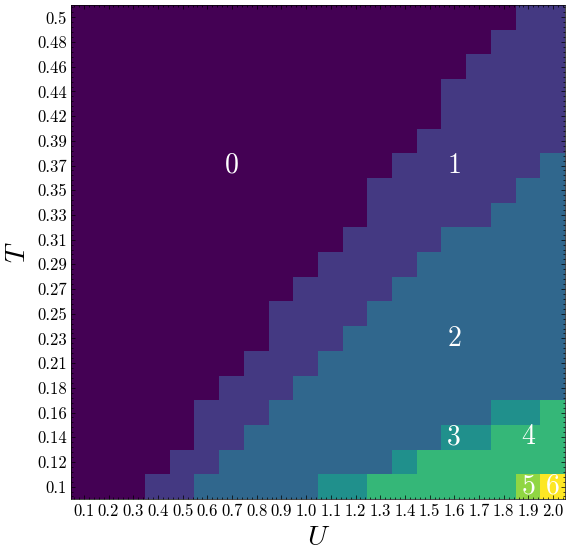

In [53]:
# loading the file
npzfile = np.load("./data/div_lines.npz")
num_evs_negative = npzfile['arr_0']
betas = npzfile['arr_1']
us = npzfile['arr_2']

# plot of vertex div lines
fig, ax = plt.subplots(figsize=(9,6))
im = ax.imshow(num_evs_negative, origin='lower')

ax.set_xticks(np.arange(len(us)))
ax.set_yticks(np.arange(len(betas)))

ax.set_xticklabels(np.round(us, 2), fontsize=12)
ax.set_yticklabels(np.round(1/betas, 2), fontsize=12)

ax.set_xlabel(r"$U$")
ax.set_ylabel(r"$T$")

text = ax.text(6, 13, 0, ha="center", va="center", color="w", fontsize=20)
text = ax.text(15, 13, 1, ha="center", va="center", color="w", fontsize=20)
text = ax.text(15, 6, 2, ha="center", va="center", color="w", fontsize=20)
text = ax.text(15, 2, 3, ha="center", va="center", color="w", fontsize=20)
text = ax.text(18, 2, 4, ha="center", va="center", color="w", fontsize=20)
text = ax.text(18, 0, 5, ha="center", va="center", color="w", fontsize=20)
text = ax.text(19, 0, 6, ha="center", va="center", color="w", fontsize=20)

'''for i in range(len(betas)):
    for j in range(len(us)):
        text = ax.text(j, i, num_evs_negative[i, j].astype(int),
                       ha="center", va="center", color="w")'''

fig.tight_layout()
plt.savefig('graphics/num_negative_evs.pdf', bbox_inches='tight')

### Analysis of First Eigenvector

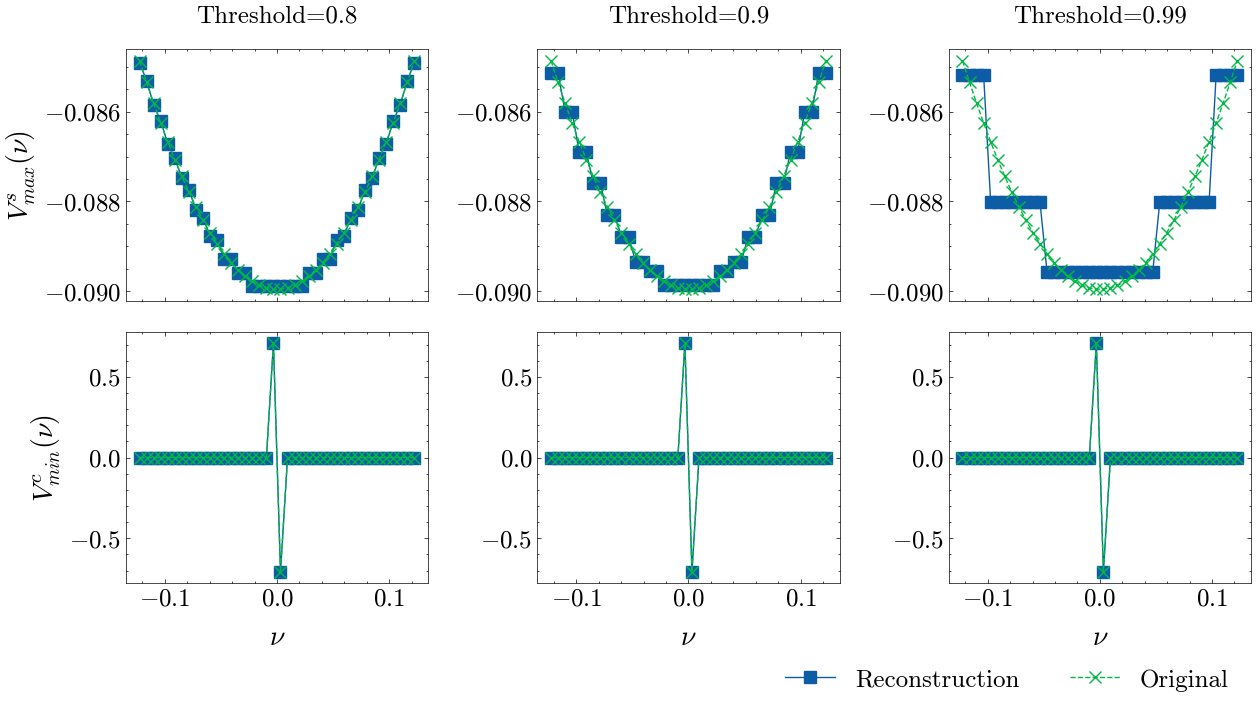

In [18]:
# load file
data = pd.read_pickle("./data/v1_data.pkl")

# plot of original and reconstructed EVs
niwf = 256
fig, axs = plt.subplots(2,len(data)//2, figsize=(13, 7), sharey=False, sharex=True)
axs = axs.flatten()

nu_offset = 20
nu_range = slice(niwf-nu_offset, niwf+nu_offset)
nu_values = (2*np.arange(-nu_offset, nu_offset)+1)*np.pi/beta

# Loop over each row in the DataFrame
for i, row in data.iterrows():
    axs[i].plot(nu_values, row['v_rec'][nu_range].real, label=f"Reconstruction", marker='s')
    idx = i-i
    axs[i].plot(nu_values, row['v'][nu_range].real, label='Original', linestyle='--', marker='x')
    if i<3:
        axs[i].set_title(f"Threshold={row['threshold']}", pad=20)
    #axs[i].xaxis.set_ticks(nu_values[nu_values % 2 == 0])
    if i>2:
        axs[i].set_xlabel(r"$\nu$", labelpad=10)

# Set y-label on the leftmost subplot
axs[0].set_ylabel(r"$V^s_{max}(\nu)$")
axs[3].set_ylabel(r"$V^c_{min}(\nu)$")

# Adjust layout for readability
plt.tight_layout()

# Optional: Add legend to the last plot
axs[-1].legend(bbox_to_anchor=(1, -0.25), ncol=2)

plt.savefig("graphics/first_ev.pdf", bbox_inches="tight")


# Vertex Frequency Box and Wavelet Basis

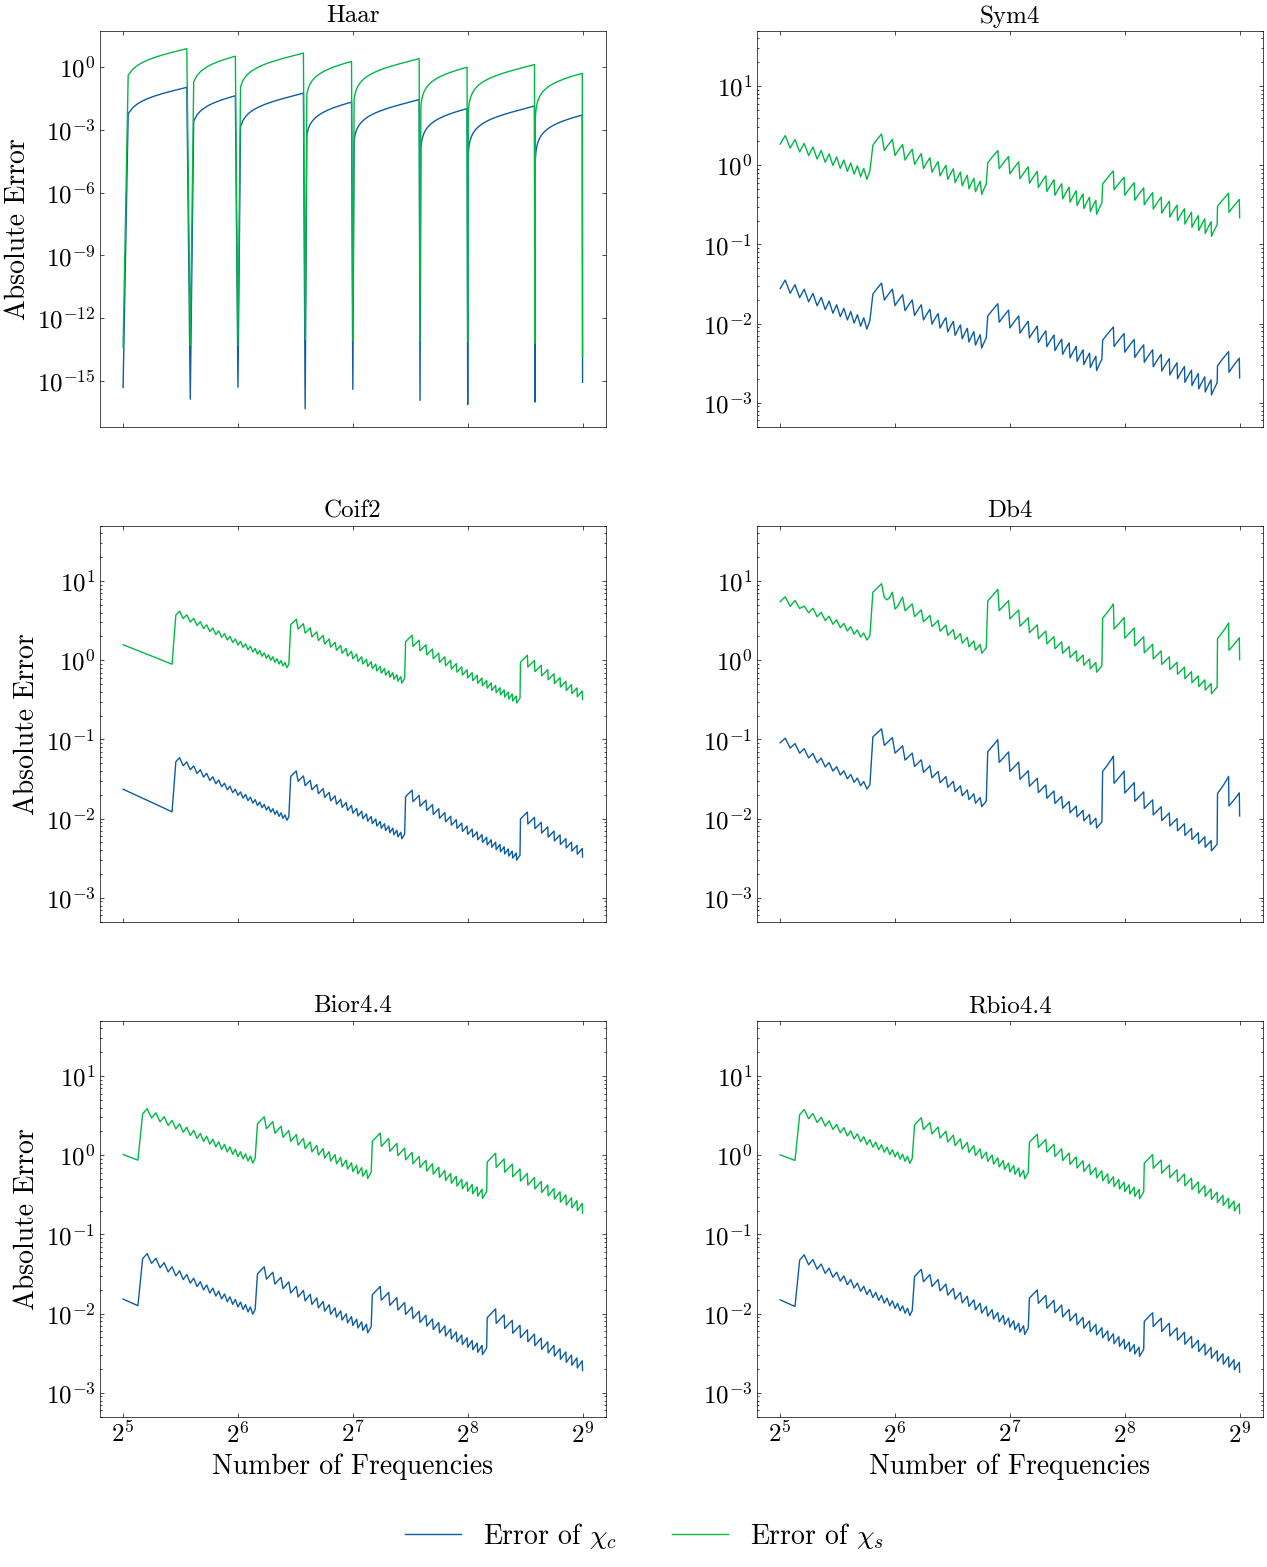

In [19]:
# load from file
q = 1.
data = pd.read_pickle(f"./data/freq_box_data_q{q}.pkl")

# plot error metrics
waveletbases = data['basis'].unique()
fig, axs = plt.subplots(3, len(waveletbases)//3, figsize=(15,18),
                        gridspec_kw={'wspace':0.3, 'hspace': 0.25}, sharey=False, sharex=True)
axs = axs.flatten()

# metric to plot
metric = "abs_err"

# loop over the df
for b_idx, basis in enumerate(waveletbases):
    tmp_df = data.loc[data['basis']==basis]
    
    axs[b_idx].plot(tmp_df["niwf"], tmp_df[f"{metric}_c"], label=r"Error of $\chi_c$")
    axs[b_idx].plot(tmp_df["niwf"], tmp_df[f"{metric}_s"], label=r"Error of $\chi_s$")
    if b_idx%2==0:
        axs[b_idx].set_ylabel("Absolute Error")
    if b_idx==len(waveletbases)-1 or b_idx==len(waveletbases)-2:
        axs[b_idx].set_xlabel("Number of Frequencies")
    axs[b_idx].set_yscale('log')
    axs[b_idx].set_xscale('log', base=2)
    axs[b_idx].set_title(f"{basis}".capitalize())
    
    # set scales
    if basis!='haar':
        axs[b_idx].set_ylim(5e-4, 5e1)
axs[b_idx].legend(ncol=2, bbox_to_anchor=(0.3, -0.2), prop={'size':20})
plt.savefig(f"graphics/wl_bases_err_q{q}.pdf", bbox_inches="tight")

# Compression of G2 in SDE

### Compression along 2d slices

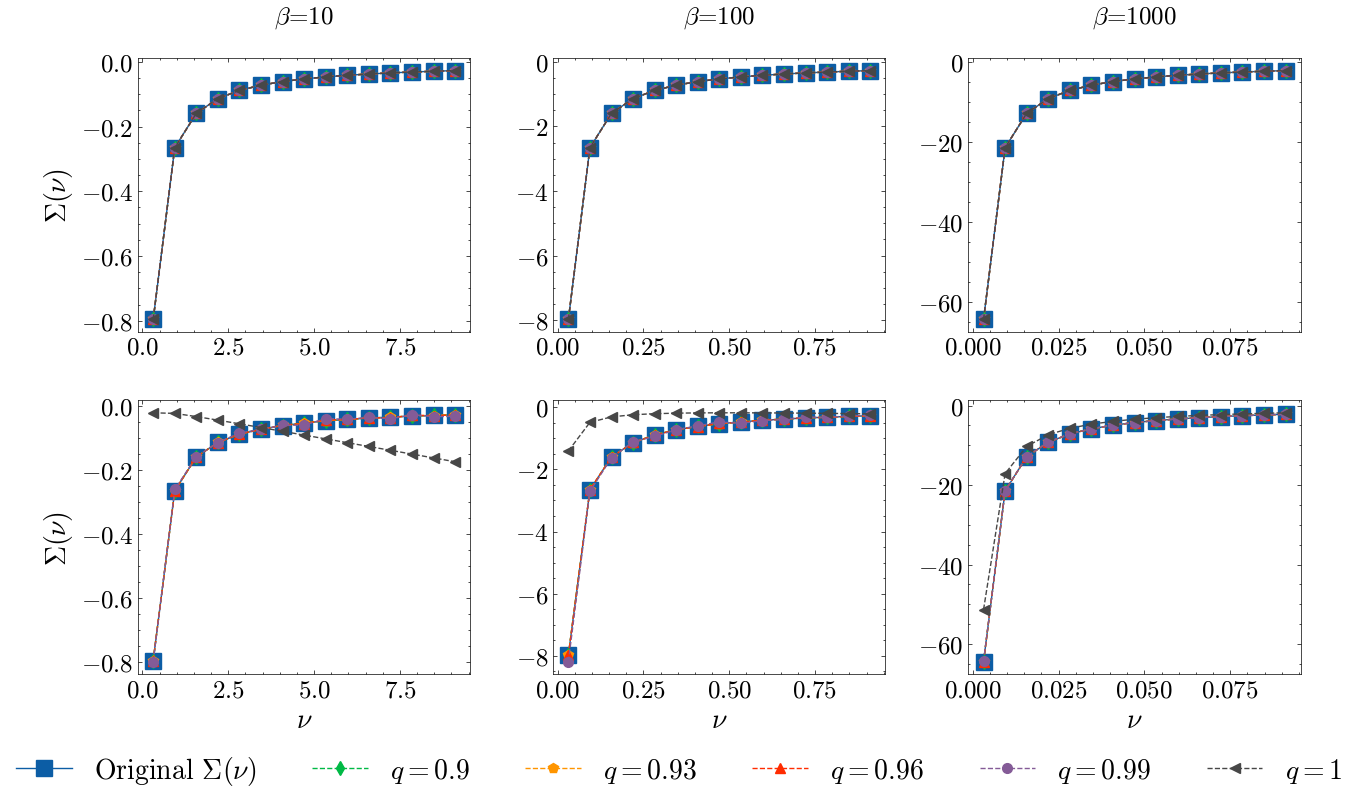

In [20]:
# plot to compare 2d and 3d compression
data_2d = pd.read_pickle("./data/sde_2d_data.pkl")
data_3d = pd.read_pickle("./data/sde_3d_data.pkl")
niwf=64

# plot
fig, axs = plt.subplots(2,3, figsize=(15,8), gridspec_kw={'hspace': 0.25, 'wspace':0.25})
markers = ['s', 'd', 'p', '^', 'o', '<', '>', 'x', '*', '+']
basis = "haar"

data = data_2d
for beta_idx, beta in enumerate(data['beta'].unique()):
    for t_idx, thresh in enumerate(data['threshold_quantile'].unique()):
        pltdata = data.loc[(data["basis"]==basis) & (data["beta"]==beta) & (data["threshold_quantile"]==thresh)]
        niw=15
        nu = (2*np.arange(niw) + 1)*np.pi/beta
        if thresh==0:
            axs[0,beta_idx].plot(nu, pltdata["selfenergy"].to_numpy()[0].imag[niwf:niwf+niw], marker=markers[t_idx], ms=12, label=r"Original $\Sigma(\nu)$")
        else:
            axs[0,beta_idx].plot(nu, pltdata["selfenergy"].to_numpy()[0].imag[niwf:niwf+niw], marker=markers[t_idx], ls="--", ms=7, label=rf"$q=${thresh}")
        #axs[0,beta_idx].set_xlabel(r"$\nu$")
        axs[0,beta_idx].set_title(rf"$\beta$={beta}", y=1.1)
axs[0,0].set_ylabel(r"$\Sigma(\nu)$")

data = data_3d
for beta_idx, beta in enumerate(data['beta'].unique()):
    for t_idx, thresh in enumerate(data['threshold_quantile'].unique()):
        pltdata = data.loc[(data["basis"]==basis) & (data["beta"]==beta) & (data["threshold_quantile"]==thresh)]
        niw=15
        nu = (2*np.arange(niw) + 1)*np.pi/beta
        if thresh==0:
            axs[1,beta_idx].plot(nu, pltdata["selfenergy"].to_numpy()[0].imag[niwf:niwf+niw], marker=markers[t_idx], ms=12, label=r"Original $\Sigma(\nu)$")
        else:
            axs[1,beta_idx].plot(nu, pltdata["selfenergy"].to_numpy()[0].imag[niwf:niwf+niw], marker=markers[t_idx], ls="--", ms=7, label=rf"$q=${thresh}")
        axs[1,beta_idx].set_xlabel(r"$\nu$")
axs[1,0].set_ylabel(r"$\Sigma(\nu)$")
axs[1,beta_idx].legend(ncol=len(data['threshold_quantile'].unique()), bbox_to_anchor=(1.2, -0.2), prop={'size':20})

plt.savefig("graphics/se_2d_3d.pdf", bbox_inches="tight")


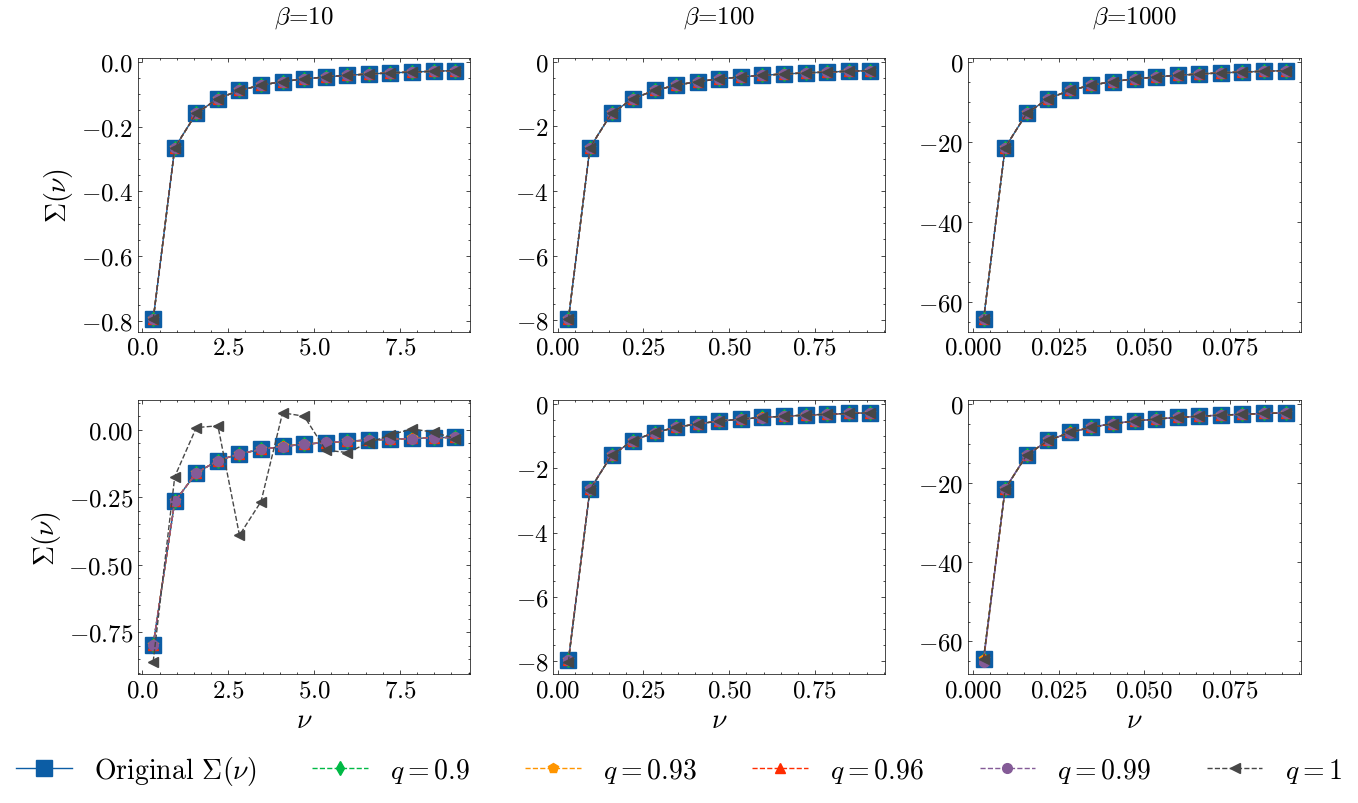

In [21]:
# plot to compare 2d and 3d compressio for biorth
data_2d = pd.read_pickle("./data/sde_2d_data.pkl")
data_3d = pd.read_pickle("./data/sde_3d_data.pkl")
niwf=64

# plot
fig, axs = plt.subplots(2,3, figsize=(15,8), gridspec_kw={'hspace': 0.25, 'wspace':0.25})
markers = ['s', 'd', 'p', '^', 'o', '<', '>', 'x', '*', '+']
basis = "bior6.8"

data = data_2d
for beta_idx, beta in enumerate(data['beta'].unique()):
    for t_idx, thresh in enumerate(data['threshold_quantile'].unique()):
        pltdata = data.loc[(data["basis"]==basis) & (data["beta"]==beta) & (data["threshold_quantile"]==thresh)]
        niw=15
        nu = (2*np.arange(niw) + 1)*np.pi/beta
        if thresh==0:
            axs[0,beta_idx].plot(nu, pltdata["selfenergy"].to_numpy()[0].imag[niwf:niwf+niw], marker=markers[t_idx], ms=12, label=r"Original $\Sigma(\nu)$")
        else:
            axs[0,beta_idx].plot(nu, pltdata["selfenergy"].to_numpy()[0].imag[niwf:niwf+niw], marker=markers[t_idx], ls="--", ms=7, label=rf"$q=${thresh}")
        #axs[0,beta_idx].set_xlabel(r"$\nu$")
        axs[0,beta_idx].set_title(rf"$\beta$={beta}", y=1.1)
axs[0,0].set_ylabel(r"$\Sigma(\nu)$")

data = data_3d
for beta_idx, beta in enumerate(data['beta'].unique()):
    for t_idx, thresh in enumerate(data['threshold_quantile'].unique()):
        pltdata = data.loc[(data["basis"]==basis) & (data["beta"]==beta) & (data["threshold_quantile"]==thresh)]
        niw=15
        nu = (2*np.arange(niw) + 1)*np.pi/beta
        if thresh==0:
            axs[1,beta_idx].plot(nu, pltdata["selfenergy"].to_numpy()[0].imag[niwf:niwf+niw], marker=markers[t_idx], ms=12, label=r"Original $\Sigma(\nu)$")
        else:
            axs[1,beta_idx].plot(nu, pltdata["selfenergy"].to_numpy()[0].imag[niwf:niwf+niw], marker=markers[t_idx], ls="--", ms=7, label=rf"$q=${thresh}")
        axs[1,beta_idx].set_xlabel(r"$\nu$")
axs[1,0].set_ylabel(r"$\Sigma(\nu)$")
axs[1,beta_idx].legend(ncol=len(data['threshold_quantile'].unique()), bbox_to_anchor=(1.2, -0.2), prop={'size':20})

plt.savefig("graphics/se_2d_3d_bior.pdf", bbox_inches="tight")


# Preservation of centrosymmetry

/Users/eminmoghadas/anaconda3/envs/waves/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


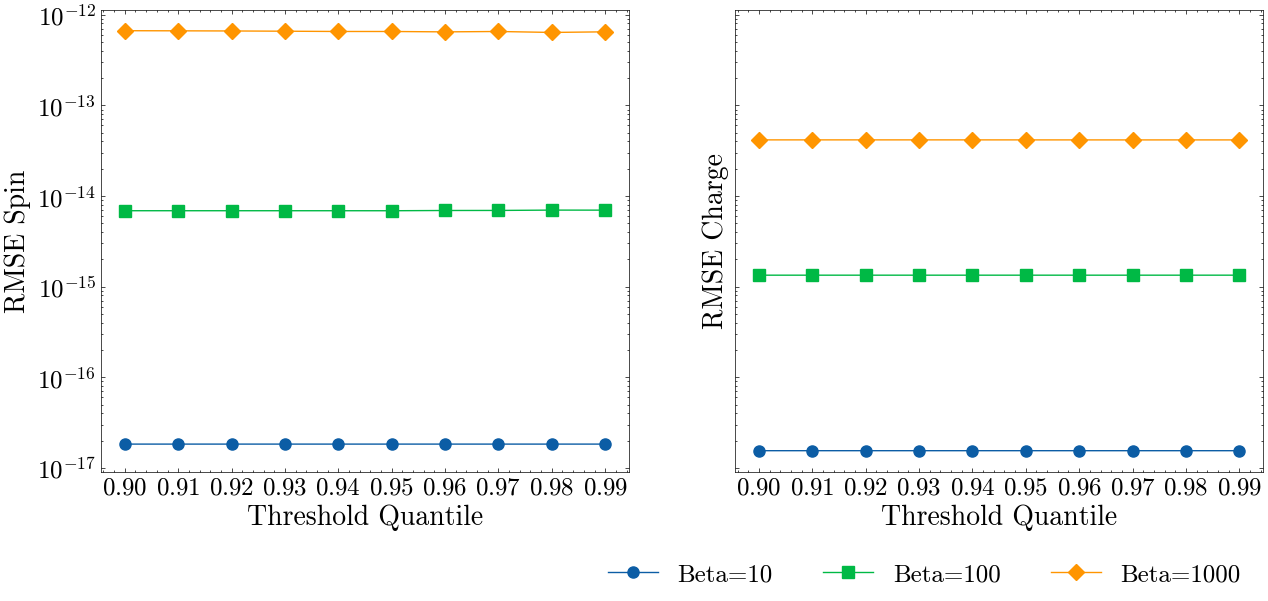

In [22]:
# load data
df = pd.read_pickle("./data/sym_data.pkl")

# Create a figure and an axis for the plot.
fig, ax = plt.subplots(1,2, figsize=(15,6), gridspec_kw={'wspace':0.2}, sharey=True)

# Define markers for different betas.
markers = ['o', 's', 'D'] # Circle, square, diamond.

# Plot a line for each beta value.
for beta, marker in zip(df['beta'].unique(), markers):
    temp_df = df[(df['beta']==beta) & (df['basis']=='haar')]
    ax[0].plot(temp_df['threshold_quantile'], temp_df['mse_spin_sym'], marker=marker, label=f'Beta={beta}')
    ax[1].plot(temp_df['threshold_quantile'], temp_df['mse_charge_sym'], marker=marker, label=f'Beta={beta}')

# Adding labels and title.
ax[0].set_xlabel('Threshold Quantile')
ax[1].set_xlabel('Threshold Quantile')
ax[0].set_ylabel('RMSE Spin')
ax[1].set_ylabel('RMSE Charge')

# Set the y-axis to be logarithmic.
ax[0].set_yscale('log')
ax[1].set_yscale('log')

ax[0].set_xticks(df['threshold_quantile'].unique())
ax[1].set_xticks(df['threshold_quantile'].unique())

ax[1].legend(bbox_to_anchor=(1, -0.15), ncol=3)

# Show the plot.
plt.savefig('graphics/symmetry_rec.pdf', bbox_inches='tight')

/Users/eminmoghadas/anaconda3/envs/waves/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


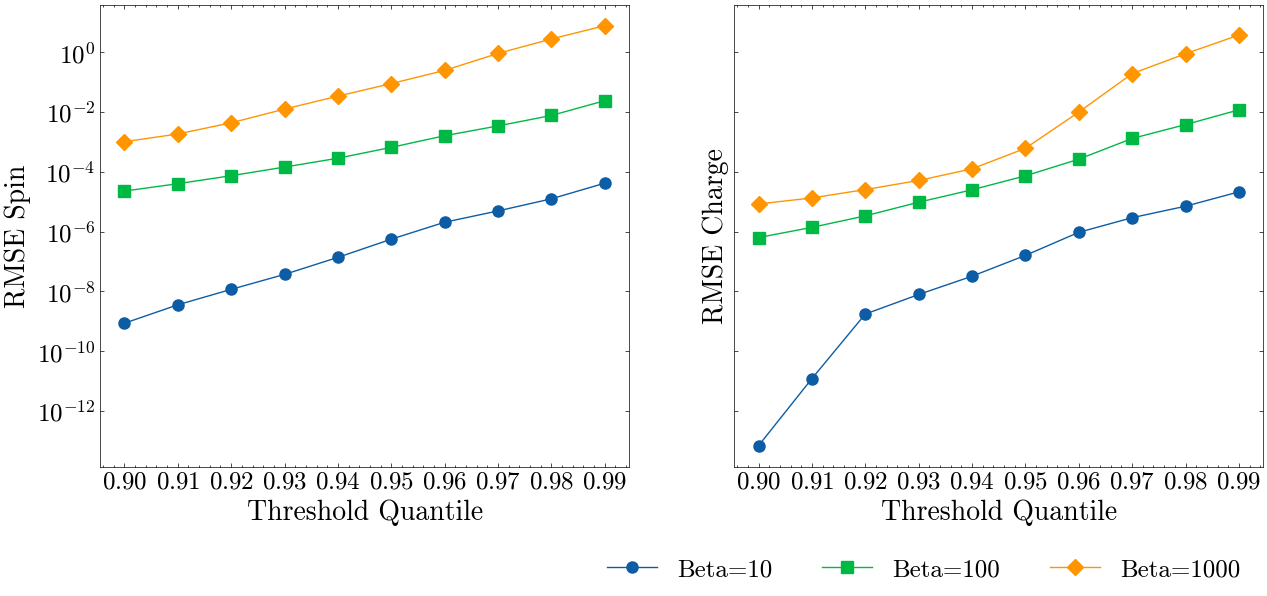

In [23]:
# load data
df = pd.read_pickle("./data/sym_data.pkl")

# Create a figure and an axis for the plot.
fig, ax = plt.subplots(1,2, figsize=(15,6), gridspec_kw={'wspace':0.2}, sharey=True)

# Define markers for different betas.
markers = ['o', 's', 'D'] # Circle, square, diamond.

# Plot a line for each beta value.
for beta, marker in zip(df['beta'].unique(), markers):
    temp_df = df[(df['beta']==beta) & (df['basis']=='bior4.4')]
    ax[0].plot(temp_df['threshold_quantile'], temp_df['mse_spin_sym'], marker=marker, label=f'Beta={beta}')
    ax[1].plot(temp_df['threshold_quantile'], temp_df['mse_charge_sym'], marker=marker, label=f'Beta={beta}')

# Adding labels and title.
ax[0].set_xlabel('Threshold Quantile')
ax[1].set_xlabel('Threshold Quantile')
ax[0].set_ylabel('RMSE Spin')
ax[1].set_ylabel('RMSE Charge')

# Set the y-axis to be logarithmic.
ax[0].set_yscale('log')
ax[1].set_yscale('log')

ax[0].set_xticks(df['threshold_quantile'].unique())
ax[1].set_xticks(df['threshold_quantile'].unique())

ax[1].legend(bbox_to_anchor=(1, -0.15), ncol=3)

# Show the plot.
plt.savefig('graphics/symmetry_rec_bior.pdf', bbox_inches='tight')

/Users/eminmoghadas/anaconda3/envs/waves/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


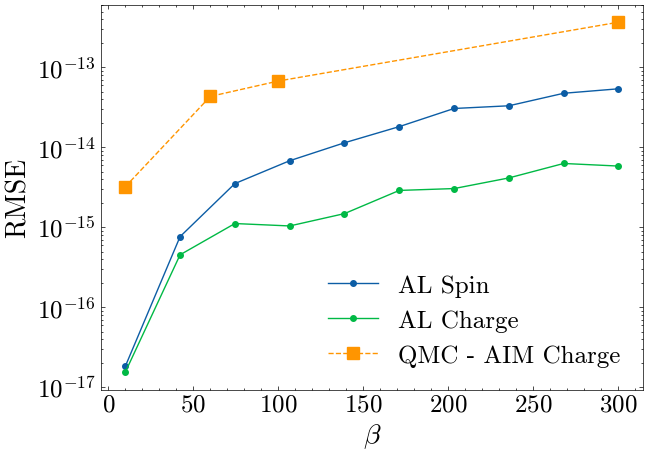

In [24]:
# comparison with QMC
data = pd.read_pickle("./data/sym_qmc.pkl")
npzfile = np.load("./data/qmc_data.npz")
betas = npzfile['betas']
sym_rmse = npzfile['qmc_rmse']

#plot with qmc results
fig,ax = plt.subplots(1,1, figsize=(7,5))

ax.plot(data['beta'], data['rmse_spin'], ".-", label="AL Spin")
ax.plot(data['beta'], data['rmse_charge'], ".-", label="AL Charge")
ax.plot(betas, sym_rmse, "s--", label="QMC - AIM Charge")
ax.set_yscale('log')
ax.set_xlabel(r"$\beta$")
ax.set_ylabel(r"RMSE")
ax.legend()

plt.savefig("graphics/qmc_comp.pdf", bbox_inches="tight")